<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 우선 머신러닝 모델링을 위한 코딩을 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Boston 데이터를 대상으로 모델링를 진행합니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [10]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 하위 몇 개 행 확인
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# 기초통계량 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# 상관관계 확인
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

In [9]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [13]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 모델: LinearRegression
- 평가: mean_absolute_error

In [14]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [15]:
# 2단계: 선언하기
model = LinearRegression()

In [16]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4단계: 예측하기 
y_pred = model.predict(x_test) # ← predict 에는 정답은 오지 않는다

In [19]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred)

3.4962689389088837

> 3달러 정도 평균 절대 오차 mean_absolute_error(MAE)

>  평균 절대 오차 mean_absolute_error(MAE)

- 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화  
-  실제값과 예측값 차이에 절대값을 씌워서 다 더하고 갯수로 나눈 값

> mean_absolute_error는 연속형값을 예측하는 회귀에서만 사용

In [20]:
# 실제값(Actual)
y_test.values

array([20.1, 11.9, 20.6, 33.2, 20.8, 13.5, 24.7, 13.9, 10.4, 19.7, 21.4,
       20.3, 18.5, 12.7, 22. , 36.2,  7.4, 16.3, 23.3, 17.5, 21.5, 19.5,
        8.8, 31.5, 50. , 50. , 23.7, 22.5, 18. , 27.9, 21.7, 28.6, 20. ,
       17.5,  8.3, 12.1, 13.8, 27.1, 14.9, 21.9,  8.3, 15.1, 20.4,  8.5,
       14.1, 37.9, 16.2, 13.9, 12.5, 15. , 22.3, 11.3, 32.2, 28.2, 23.8,
       15.3, 24.3, 25. , 27.5, 19.4, 16.1, 27.5, 13.1, 30.1, 27.1, 18.9,
       32.9, 21.2, 36.2, 18.1, 10.2, 23.1,  7.5, 20.1, 23.3, 14.4,  8.1,
       10.2,  6.3, 29. , 16.2, 22. , 20.5, 22.8, 23.2,  9.7, 26.6, 27.9,
        7.2, 36.5, 22.1, 25. , 23.9, 13.2, 16.7, 22. , 22.8, 19.4, 13.8,
       23. , 33.1, 11.7, 44. , 22.3, 23.1, 17.4, 48.3, 29.1,  7. , 37.3,
       14.1,  9.5,  5. , 20.6, 31.1, 24.1, 25. , 21.5, 20.6, 29. , 39.8,
       23.3, 25.1, 22.9, 26.5, 19.6,  8.7, 23.1, 13.4, 14.9, 19.1, 14. ,
       21.1, 22.6, 25. , 42.3, 25. ,  8.4, 29.9,  9.6, 35.2, 46.7, 33.1,
       18.9,  7.2, 29.8, 17.5,  8.4, 15.2, 18.5, 18

In [21]:
# 예측값(predicted)
y_pred

array([20.88566748,  6.89636331, 21.65154125, 36.14069689, 18.45956083,
       13.30883661, 24.91776579, 12.87228082,  6.87425442, 13.36452119,
       22.06995871, 22.28587905, 24.91364158, 13.48445647, 21.99436042,
       28.37567016,  5.11272684, 11.29182719, 26.89493508, 16.60309028,
       24.82573197, 16.30644352,  2.49751658, 33.23352892, 33.52631123,
       41.74106089, 27.68027368, 17.31382648, 19.16749231, 31.34683278,
       21.73369482, 29.07924086, 16.2189188 , 17.93970362, 12.80286805,
       18.63040492,  5.22670438, 19.20744939, 18.36986798, 40.1446065 ,
       10.3565065 , 17.27718174, 19.95470314,  7.40816029, 17.93713479,
       33.69074894, 20.14676948, 18.17878773, 19.6818803 , 18.84734323,
       26.96736084, 13.23111886, 31.51766932, 32.19354627, 25.50855276,
       20.9749107 , 20.0649923 , 29.02893576, 13.34248144, 16.61592329,
       19.14810315, 20.318017  , 13.58115075, 25.63446398, 27.73080839,
       18.70111729, 30.7127418 , 23.20561157, 27.13442955, 17.46

예측값과 실제값 시각화 비교

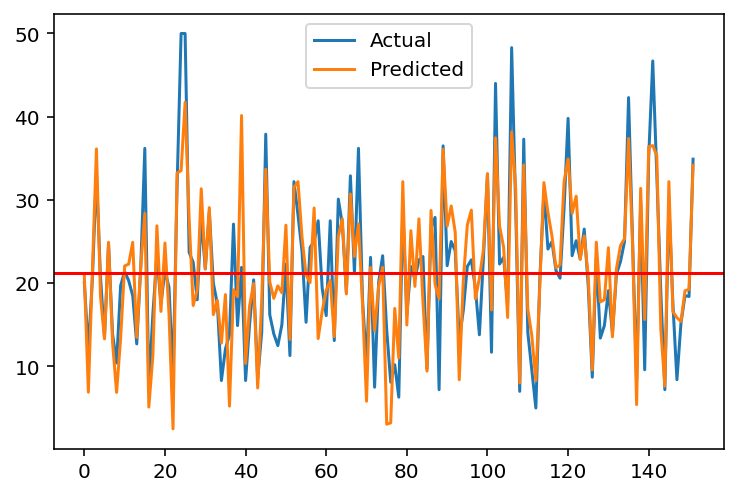

In [26]:
mean_medv = y_test.values.mean()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.axhline(mean_medv, color='r')
plt.show()

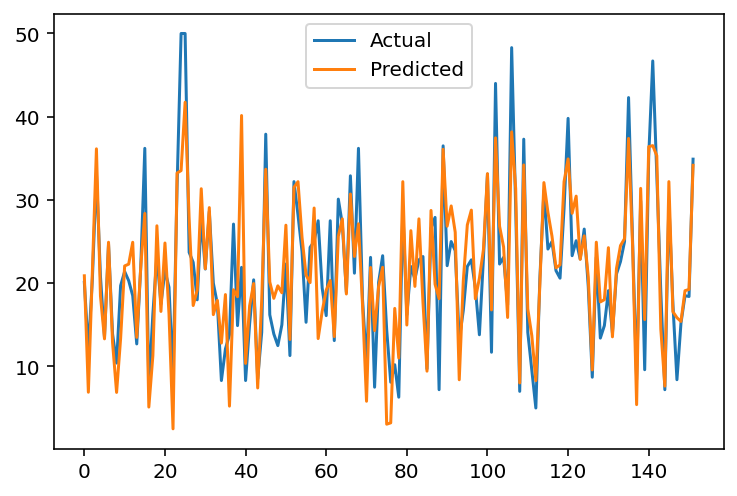

In [34]:
# 예측값 시각화 비교
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()